# Beak Data Challenge - Data Analyst
## Database exploration and analysis

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text


### Setup the database server
credentials = {
    'host':'35.227.110.100',
    'dbname':'postgres',
    'user':'postgres',
    'password':'n$EYUJRrmZ9jz2>7o',
    'port':'5432'
}

sql_engine = create_engine(f"postgresql://{credentials['user']}:{credentials['password']}@{credentials['host']}:{credentials['port']}/{credentials['dbname']}")

def runQuery(sql):
    result = sql_engine.connect().execution_options(isolation_level="AUTOCOMMIT").execute((text(sql)))
    return pd.DataFrame(result.fetchall(), columns=result.keys())

In [2]:
# Load Tables as DataFrames using Pandas

df_audiobook = runQuery(f""" SELECT *
    FROM audiobook
    """)
df_book_categories = runQuery(f""" SELECT *
    FROM book_categories
    """)
df_audiobook_plays = runQuery(f""" SELECT *
    FROM audiobook_plays
    """)
df_users = runQuery(f""" SELECT *
    FROM users
    """)

In [16]:
df_audiobook_plays.head()

,id,created_at,user_id,audiobook_id,seconds
0,474656,2018-12-09 00:05:55.712025,877003,249057,446.337
1,474657,2018-12-09 00:07:40.623874,877003,249057,98.289
2,474658,2018-12-09 00:11:32.009699,877003,249057,186.955
3,474659,2018-12-09 01:07:17.111202,877003,249057,279.780
4,474660,2018-12-09 01:08:37.949031,877003,249057,17.819


In [19]:
df_users.rename(columns={"id": "user_id"}, inplace=True)
df_users.head()

,user_id,created_at,last_sign_in_at,gender,has_seen_onboarding,has_been_subscribed
0,953304,2019-02-06 14:55:09.831247,2019-02-06 14:55:09.840241,unknown,False,False
1,953305,2019-02-06 14:55:14.374629,2019-02-06 14:55:17.487108,unknown,True,False
2,957297,2019-02-11 14:44:30.186194,2019-02-11 14:44:31.017950,unknown,False,False
3,953306,2019-02-06 14:55:44.202073,2019-02-06 14:55:44.211160,unknown,False,False
4,953307,2019-02-06 14:56:36.998561,2019-02-06 14:56:37.005049,unknown,False,False


In [25]:
# Create list for user-audiobook_plays
df_user_audiobook = df_audiobook_plays.join(df_users, on="user_id", how="inner",lsuffix="ab", rsuffix="u")
df_user_audiobook.tail()

,user_id,id,created_atab,user_idab,audiobook_id,seconds,user_idu,created_atu,last_sign_in_at,gender,has_seen_onboarding,has_been_subscribed
98254,18165,573028,2019-04-02 15:00:00.689126,18165,143840,2192.813,892548,2018-12-09 17:18:35.098792,2018-12-09 17:18:35.859473,unknown,False,False
98927,18165,573701,2019-04-03 16:19:27.211005,18165,143840,993.925,892548,2018-12-09 17:18:35.098792,2018-12-09 17:18:35.859473,unknown,False,False
98928,18165,573702,2019-04-03 16:19:27.222380,18165,143840,1.241,892548,2018-12-09 17:18:35.098792,2018-12-09 17:18:35.859473,unknown,False,False
99471,18165,574245,2019-04-04 08:50:31.708005,18165,140690,35.762,892548,2018-12-09 17:18:35.098792,2018-12-09 17:18:35.859473,unknown,False,False
102885,73878,577659,2019-04-08 05:52:31.364019,73878,135595,12.929,979945,2019-03-20 15:25:09.564939,2019-03-20 15:25:09.573435,unknown,False,False


In [27]:
df_book_categories.head()

,id,book_cateogory_code,created_at,name
0,1,ANT000000,2017-12-25 23:11:20.611793,Antiques & Collectibles / General
1,2,ANT001000,2017-12-25 23:11:21.126837,Antiques & Collectibles / Americana
2,3,ANT002000,2017-12-25 23:11:21.358555,Antiques & Collectibles / Art
3,4,ANT003000,2017-12-25 23:11:21.594814,Antiques & Collectibles / Autographs
4,5,ANT005000,2017-12-25 23:11:21.826704,Antiques & Collectibles / Books


In [28]:
# Create list for user-audiobook_plays
df_user_book_categories = df_audiobook_plays.join(df_book_categories, on="book_cateogory_code", how="inner",lsuffix="ab", rsuffix="bc")
df_user_book_categories.tail()

KeyError: 'book_cateogory_code'

In [11]:
# Transform in graphs and plots
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

bipartite_graph = nx.Graph()

# Bipartite network users and audiolibros weigthed by time listening

## EJemplo de red bipartita 

In [5]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

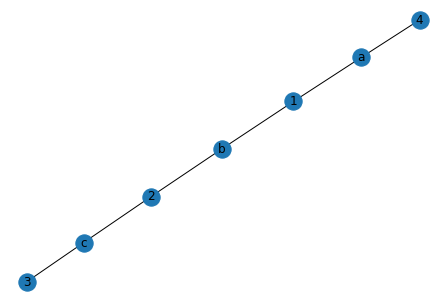

In [7]:
nx.draw(B, with_labels = True) 

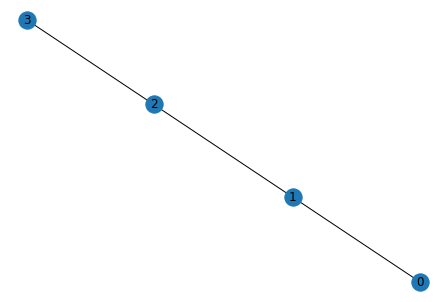

In [12]:
B = nx.path_graph(4)
nx.draw(B, with_labels = True) 

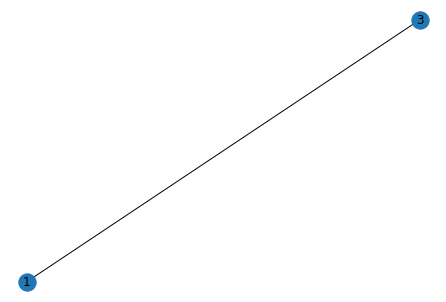

In [13]:
G = bipartite.weighted_projected_graph(B, [1,3])
nx.draw(G, with_labels = True) 

{('s1',
  's2'): Text(-0.41330140750657696, 0.046235480948900134, "{'weight': 1}"),
 ('s1',
  's3'): Text(-0.6487365980125848, -0.054829936466683216, "{'weight': 2}"),
 ('s2',
  's3'): Text(-0.39971697226825814, -0.11508618718468937, "{'weight': 1}"),
 ('s2',
  's5'): Text(0.14873659801258476, 0.012462594871731545, "{'weight': 1}"),
 ('s4', 's5'): Text(0.73087748889371, 0.0618403213512363, "{'weight': 1}")}

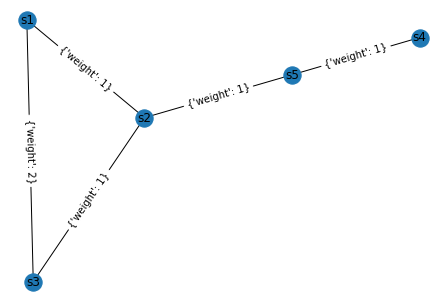

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
g=nx.Graph()
g.add_nodes_from(['s1','s2','s3','s4','s5'],bipartite=0)
g.add_nodes_from(['t1','t2','t3','t4'],bipartite=1)
g.add_edges_from([('s1','t1'),('s1','t4'),('s2','t1'),('s2','t2'),('s3','t1'),('s3','t4'),('s4','t3'),('s5','t2'),('s5','t3')])
l=bipartite.weighted_projected_graph(g,['s1','s2','s3','s4','s5'])
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)
nx.draw_networkx_edge_labels(l, pos)